In [616]:
using HTTP, CSV, DataFrames, StringEncodings, Plots

In [617]:
CONTENT_URL = "https://www.mhlw.go.jp/content/"

"https://www.mhlw.go.jp/content/"

In [618]:
OPEN_DATA_URL = "https://covid19.mhlw.go.jp/public/opendata/"

"https://covid19.mhlw.go.jp/public/opendata/"

In [619]:
POS_CSV = "newly_confirmed_cases_daily.csv"

"newly_confirmed_cases_daily.csv"

In [620]:
TST_CSV = "pcr_tested_daily.csv" 

"pcr_tested_daily.csv"

In [621]:
SVR_CSV = "severe_cases_daily.csv"

"severe_cases_daily.csv"

In [622]:
DTH_CSV = "deaths_cumulative_daily.csv"

"deaths_cumulative_daily.csv"

In [623]:
DL_DIR = "./"

"./"

In [624]:
HTTP.download(string(OPEN_DATA_URL, POS_CSV), DL_DIR)

┌ Info: Downloading
│   source = https://covid19.mhlw.go.jp/public/opendata/newly_confirmed_cases_daily.csv
│   dest = ./newly_confirmed_cases_daily.csv
│   progress = 1.0
│   time_taken = 0.21 s
│   time_remaining = 0.0 s
│   average_speed = 879.271 KiB/s
│   downloaded = 181.130 KiB
│   remaining = 0 bytes
│   total = 181.130 KiB
└ @ HTTP C:\Users\ume77\.julia\packages\HTTP\IAI92\src\download.jl:119


"./newly_confirmed_cases_daily.csv"

In [625]:
HTTP.download(string(CONTENT_URL, TST_CSV), DL_DIR)

┌ Info: Downloading
│   source = https://www.mhlw.go.jp/content/pcr_tested_daily.csv
│   dest = ./pcr_tested_daily.csv
│   progress = 1.0
│   time_taken = 0.0 s
│   time_remaining = 0.0 s
│   average_speed = 17.979 MiB/s
│   downloaded = 18.410 KiB
│   remaining = 0 bytes
│   total = 18.410 KiB
└ @ HTTP C:\Users\ume77\.julia\packages\HTTP\IAI92\src\download.jl:119


"./pcr_tested_daily.csv"

In [626]:
HTTP.download(string(OPEN_DATA_URL, SVR_CSV), DL_DIR)

┌ Info: Downloading
│   source = https://covid19.mhlw.go.jp/public/opendata/severe_cases_daily.csv
│   dest = ./severe_cases_daily.csv
│   progress = 1.0
│   time_taken = 0.15 s
│   time_remaining = 0.0 s
│   average_speed = 773.195 KiB/s
│   downloaded = 118.299 KiB
│   remaining = 0 bytes
│   total = 118.299 KiB
└ @ HTTP C:\Users\ume77\.julia\packages\HTTP\IAI92\src\download.jl:119


"./severe_cases_daily.csv"

In [627]:
HTTP.download(string(OPEN_DATA_URL, DTH_CSV), DL_DIR)

┌ Info: Downloading
│   source = https://covid19.mhlw.go.jp/public/opendata/deaths_cumulative_daily.csv
│   dest = ./deaths_cumulative_daily.csv
│   progress = 1.0
│   time_taken = 0.84 s
│   time_remaining = 0.0 s
│   average_speed = 211.340 KiB/s
│   downloaded = 177.103 KiB
│   remaining = 0 bytes
│   total = 177.103 KiB
└ @ HTTP C:\Users\ume77\.julia\packages\HTTP\IAI92\src\download.jl:119


"./deaths_cumulative_daily.csv"

In [628]:
ENCODING = enc"UTF-8"

UTF-8 string encoding

In [629]:
RATE_LIMIT = 10.0

10.0

In [630]:
pos_sum = 0

0

In [631]:
dth_sum = 0

0

In [632]:
function read_csv(file_path)
    df = CSV.File(open(read, file_path, ENCODING)) |> DataFrame
    return df
end

read_csv (generic function with 1 method)

In [633]:
df_pos = read_csv(string(DL_DIR, POS_CSV))

,Date,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki
,String,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,2020/1/16,1,0,0,0,0,0,0,0,0
2,2020/1/17,0,0,0,0,0,0,0,0,0
3,2020/1/18,0,0,0,0,0,0,0,0,0
4,2020/1/19,0,0,0,0,0,0,0,0,0
5,2020/1/20,0,0,0,0,0,0,0,0,0
6,2020/1/21,0,0,0,0,0,0,0,0,0
7,2020/1/22,0,0,0,0,0,0,0,0,0
8,2020/1/23,0,0,0,0,0,0,0,0,0
9,2020/1/24,1,0,0,0,0,0,0,0,0


In [634]:
df_tst = read_csv(string(DL_DIR, TST_CSV))

,日付,PCR 検査実施人数(単日)
,String,Int64?
1,2020/2/5,4
2,2020/2/6,19
3,2020/2/7,9
4,2020/2/8,4
5,2020/2/9,10
6,2020/2/10,12
7,2020/2/11,4
8,2020/2/12,10
9,2020/2/13,16


In [635]:
df_svr = read_csv(string(DL_DIR, SVR_CSV))

,Date,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki
,String,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,2020/5/9,267,23,0,0,0,0,0,0,3
2,2020/5/10,249,28,0,0,0,0,0,0,3
3,2020/5/11,243,26,0,0,0,0,0,0,2
4,2020/5/12,259,24,0,0,0,0,2,0,2
5,2020/5/13,245,19,0,0,0,0,2,2,2
6,2020/5/14,237,18,0,0,0,0,2,2,2
7,2020/5/15,232,17,0,0,0,0,2,2,2
8,2020/5/16,230,18,0,0,0,0,2,2,1
9,2020/5/17,228,17,0,0,0,0,2,2,1


In [636]:
df_dth = read_csv(string(DL_DIR, DTH_CSV))

,Date,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki
,String,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,2020/5/9,613,48,0,0,1,0,0,0,9
2,2020/5/10,621,51,0,0,1,0,0,0,9
3,2020/5/11,643,56,0,0,1,0,0,0,9
4,2020/5/12,668,62,0,0,1,0,0,0,9
5,2020/5/13,687,68,0,0,1,0,0,0,9
6,2020/5/14,710,70,0,0,1,0,0,0,9
7,2020/5/15,725,72,0,0,1,0,0,0,9
8,2020/5/16,744,73,0,0,1,0,0,0,9
9,2020/5/17,749,74,0,0,1,0,0,0,9


In [637]:
function get_pos_sum(x)
    global pos_sum += x
    return pos_sum
end

get_pos_sum (generic function with 1 method)

In [638]:
function get_dth_day(x)
    global dth_sum
    y = dth_sum
    dth_sum = x
    return x - y
end

get_dth_day (generic function with 1 method)

In [639]:
df_pos = df_pos[:, [:"Date",:"ALL"]]

,Date,ALL
,String,Int64
1,2020/1/16,1
2,2020/1/17,0
3,2020/1/18,0
4,2020/1/19,0
5,2020/1/20,0
6,2020/1/21,0
7,2020/1/22,0
8,2020/1/23,0
9,2020/1/24,1


In [640]:
df_svr = df_svr[:, [:"Date",:"ALL"]]

,Date,ALL
,String,Int64
1,2020/5/9,267
2,2020/5/10,249
3,2020/5/11,243
4,2020/5/12,259
5,2020/5/13,245
6,2020/5/14,237
7,2020/5/15,232
8,2020/5/16,230
9,2020/5/17,228


In [641]:
df_dth = df_dth[:, [:"Date",:"ALL"]]

,Date,ALL
,String,Int64
1,2020/5/9,613
2,2020/5/10,621
3,2020/5/11,643
4,2020/5/12,668
5,2020/5/13,687
6,2020/5/14,710
7,2020/5/15,725
8,2020/5/16,744
9,2020/5/17,749


In [642]:
rename!(df_pos, [:"日付",:"PCR 検査陽性者数(単日)"])

,日付,PCR 検査陽性者数(単日)
,String,Int64
1,2020/1/16,1
2,2020/1/17,0
3,2020/1/18,0
4,2020/1/19,0
5,2020/1/20,0
6,2020/1/21,0
7,2020/1/22,0
8,2020/1/23,0
9,2020/1/24,1


In [643]:
rename!(df_svr, [:"日付",:"重症者数"])

,日付,重症者数
,String,Int64
1,2020/5/9,267
2,2020/5/10,249
3,2020/5/11,243
4,2020/5/12,259
5,2020/5/13,245
6,2020/5/14,237
7,2020/5/15,232
8,2020/5/16,230
9,2020/5/17,228


In [644]:
df_svr[:, "重症者数(※50倍)"] = map(x -> (50 * x), df_svr[:, "重症者数"])

1012-element Array{Int64,1}:
 13350
 12450
 12150
 12950
 12250
 11850
 11600
 11500
 11400
 10650
 10500
  9750
  8800
     ⋮
 22000
 21200
 20250
 20300
 20500
 19900
 17950
 16300
 15700
 14550
 14300
 13500

In [645]:
rename!(df_dth, [:"日付",:"死亡者数"])

,日付,死亡者数
,String,Int64
1,2020/5/9,613
2,2020/5/10,621
3,2020/5/11,643
4,2020/5/12,668
5,2020/5/13,687
6,2020/5/14,710
7,2020/5/15,725
8,2020/5/16,744
9,2020/5/17,749


In [646]:
df_pos[:, "累積感染者数"] = map(x -> get_pos_sum(x), df_pos[:, :"PCR 検査陽性者数(単日)"])

1126-element Array{Int64,1}:
        1
        1
        1
        1
        1
        1
        1
        1
        2
        3
        4
        4
        7
        ⋮
 32411903
 32450469
 32482850
 32498416
 32539869
 32581441
 32614406
 32643045
 32670405
 32684088
 32693525
 32725228

In [647]:
df_tmp = innerjoin(df_pos, df_tst, on = :日付)

,日付,PCR 検査陽性者数(単日),累積感染者数,PCR 検査実施人数(単日)
,String,Int64,Int64,Int64?
1,2020/2/5,2,15,4
2,2020/2/6,0,15,19
3,2020/2/7,0,15,9
4,2020/2/8,0,15,4
5,2020/2/9,0,15,10
6,2020/2/10,0,15,12
7,2020/2/11,1,16,4
8,2020/2/12,1,17,10
9,2020/2/13,3,20,16


In [648]:
df_tmp2 = innerjoin(df_tmp, df_svr, on = :日付)

,日付,PCR 検査陽性者数(単日),累積感染者数,PCR 検査実施人数(単日),重症者数
,String,Int64,Int64,Int64?,Int64
1,2020/5/9,108,15696,2265,267
2,2020/5/10,66,15762,3995,249
3,2020/5/11,58,15820,5993,243
4,2020/5/12,87,15907,288,259
5,2020/5/13,55,15962,10074,245
6,2020/5/14,99,16061,5866,237
7,2020/5/15,55,16116,3092,232
8,2020/5/16,56,16172,4337,230
9,2020/5/17,29,16201,4987,228


In [649]:
df_dth[:, "死亡者数(単日)"] = map(x -> get_dth_day(x), df_dth[:, "死亡者数"])

1012-element Array{Int64,1}:
 613
   8
  22
  25
  19
  23
  15
  19
   5
  14
   8
   6
  19
   ⋮
 237
 256
 188
 124
 161
 200
 223
 192
 181
 137
  93
 135

In [650]:
df_dth[:, "死亡者数(単日)(※50倍)"] = map(x -> (50 * x), df_dth[:, "死亡者数(単日)"])

1012-element Array{Int64,1}:
 30650
   400
  1100
  1250
   950
  1150
   750
   950
   250
   700
   400
   300
   950
     ⋮
 11850
 12800
  9400
  6200
  8050
 10000
 11150
  9600
  9050
  6850
  4650
  6750

In [651]:
df = innerjoin(df_tmp2, df_dth, on = :日付)

,日付,PCR 検査陽性者数(単日),累積感染者数,PCR 検査実施人数(単日),重症者数
,String,Int64,Int64,Int64?,Int64
1,2020/5/9,108,15696,2265,267
2,2020/5/10,66,15762,3995,249
3,2020/5/11,58,15820,5993,243
4,2020/5/12,87,15907,288,259
5,2020/5/13,55,15962,10074,245
6,2020/5/14,99,16061,5866,237
7,2020/5/15,55,16116,3092,232
8,2020/5/16,56,16172,4337,230
9,2020/5/17,29,16201,4987,228


In [652]:
df[:, "陽性率"] = df[:, "PCR 検査陽性者数(単日)"] ./ df[:, "PCR 検査実施人数(単日)"]

1012-element Array{Float64,1}:
 0.04768211920529802
 0.016520650813516898
 0.00967795761722009
 0.3020833333333333
 0.005459598967639468
 0.016876917831571768
 0.01778783958602846
 0.012912151256629006
 0.005815119310206537
 0.005016722408026756
 0.009934802856255821
 0.010084491687108205
 0.009825327510917031
 ⋮
 0.30458471963615275
 0.2560517335245455
 0.49082944279391255
 0.5081116370164844
 0.3493485479276576
 0.2515444704629478
 0.1660546345689833
 0.2225027774972225
 0.17243661252812495
 0.22364420908110227
 0.3087215388641717
 0.24170688380107194

In [653]:
function get_rate_limited(rate)
    global RATE_LIMIT
    if rate > RATE_LIMIT
        rate = RATE_LIMIT
    end
    return rate
end

get_rate_limited (generic function with 1 method)

In [654]:
df[:, "陽性率"] = map(x -> get_rate_limited(x), df[:, "陽性率"])

1012-element Array{Float64,1}:
 0.04768211920529802
 0.016520650813516898
 0.00967795761722009
 0.3020833333333333
 0.005459598967639468
 0.016876917831571768
 0.01778783958602846
 0.012912151256629006
 0.005815119310206537
 0.005016722408026756
 0.009934802856255821
 0.010084491687108205
 0.009825327510917031
 ⋮
 0.30458471963615275
 0.2560517335245455
 0.49082944279391255
 0.5081116370164844
 0.3493485479276576
 0.2515444704629478
 0.1660546345689833
 0.2225027774972225
 0.17243661252812495
 0.22364420908110227
 0.3087215388641717
 0.24170688380107194

In [655]:
df[:, "致死率"] = df[:, "死亡者数"] ./ df[:, "累積感染者数"]

1012-element Array{Float64,1}:
 0.03905453618756371
 0.039398553483060525
 0.04064475347661188
 0.04199409065191425
 0.04303971933341687
 0.044206462860344936
 0.044986348969967734
 0.04600544150383379
 0.046231714091722734
 0.047008810301275336
 0.04740822726434237
 0.047668711656441716
 0.048699908228816154
 ⋮
 0.0021298656854551244
 0.002135223376894799
 0.0021388825180056552
 0.0021416736126462286
 0.002143893080823405
 0.0021472960634245737
 0.0021519631539510483
 0.0021559569580595194
 0.002159691623045383
 0.0021629791230521715
 0.0021651993781643306
 0.0021672270701979524

In [656]:
println(df)

1012×11 DataFrame
  Row │ 日付        PCR 検査陽性者数(単日)  累積感染者数  PCR 検査実施人数(単日)  重症者数  重症者数(※50倍)  死亡者数  死亡者数(単日)  死亡者数(単日)(※50倍)  陽性率        致死率     
      │ String      Int64                   Int64         Union{Missing, Int64}   Int64     Int64            Int64     Int64           Int64                  Float64       Float64    
──────┼────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
    1 │ 2020/5/9                       108         15696                    2265       267            13350       613             613                  30650   0.0476821    0.0390545
    2 │ 2020/5/10                       66         15762                    3995       249            12450       621               8                    400   0.0165207    0.0393986
    3 │ 2020/5/11                       58         15820                    5993       243            12150       643     

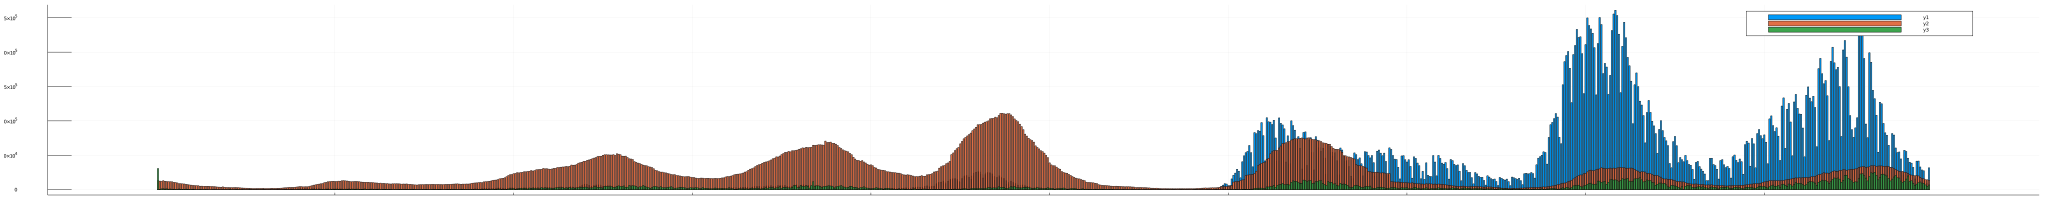

In [657]:
plot!(plot!(plot(
    df[:, "日付"], df[:, "PCR 検査陽性者数(単日)"], st=:bar, size=(5000, 500)),
    df[:, "日付"], df[:, "重症者数(※50倍)"], st=:bar, size=(5000, 500)),
    df[:, "日付"], df[:, "死亡者数(単日)(※50倍)"], st=:bar, size=(5000, 500))

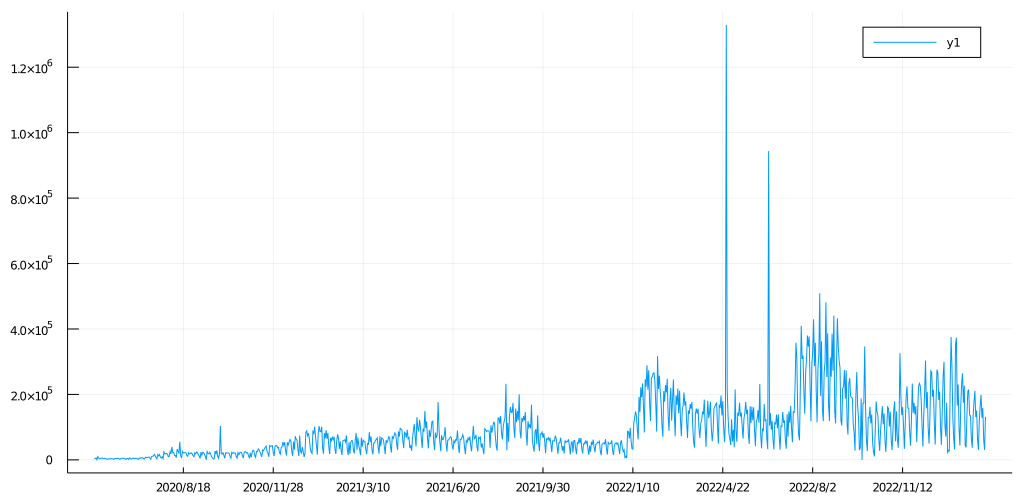

In [658]:
plot(df[:, "日付"], df[:, "PCR 検査実施人数(単日)"], size=(1024, 500))

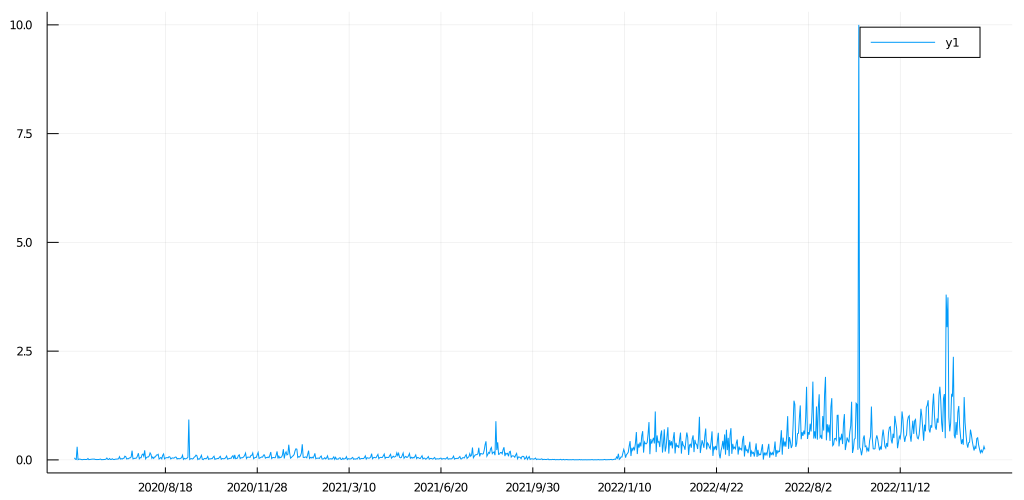

In [659]:
plot(df[:, "日付"], df[:, "陽性率"], size=(1024, 500))

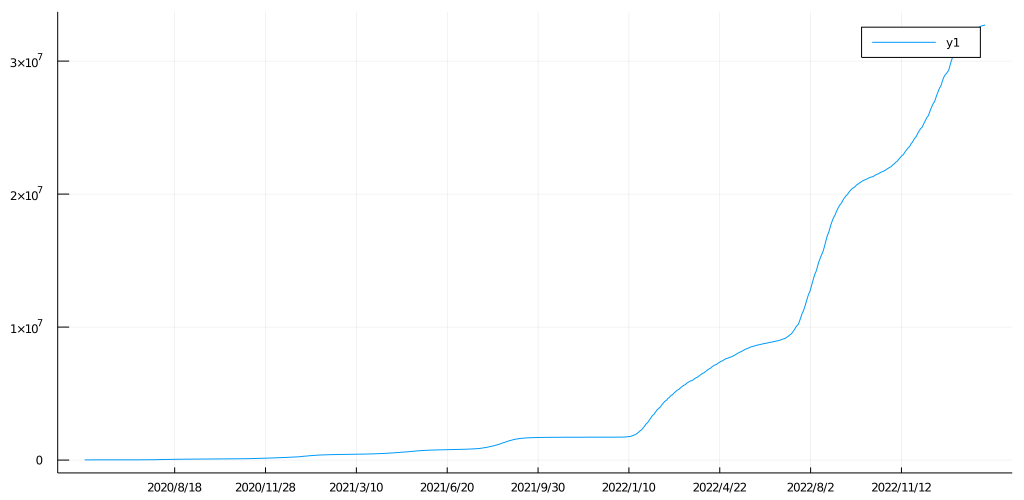

In [660]:
plot(df[:, "日付"], df[:, "累積感染者数"], size=(1024, 500))

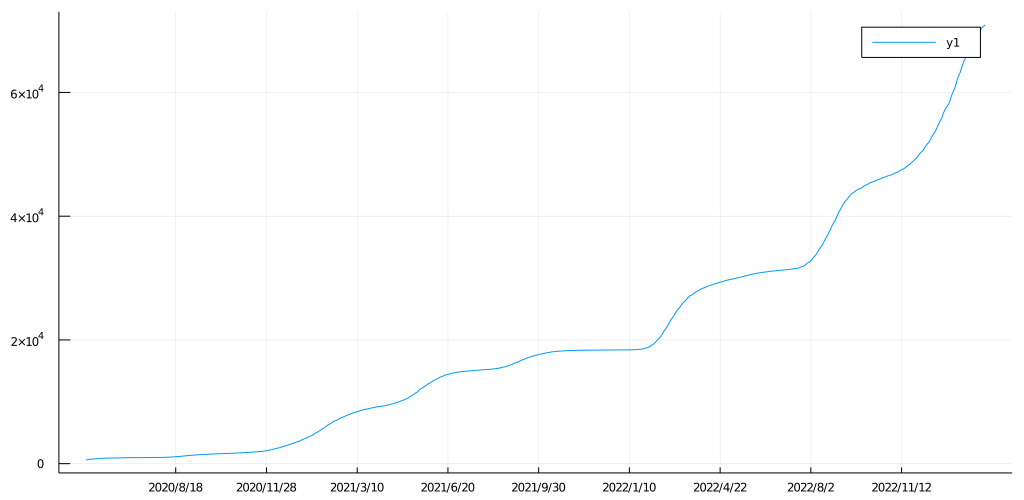

In [661]:
plot(df[:, "日付"], df[:, "死亡者数"], size=(1024, 500))

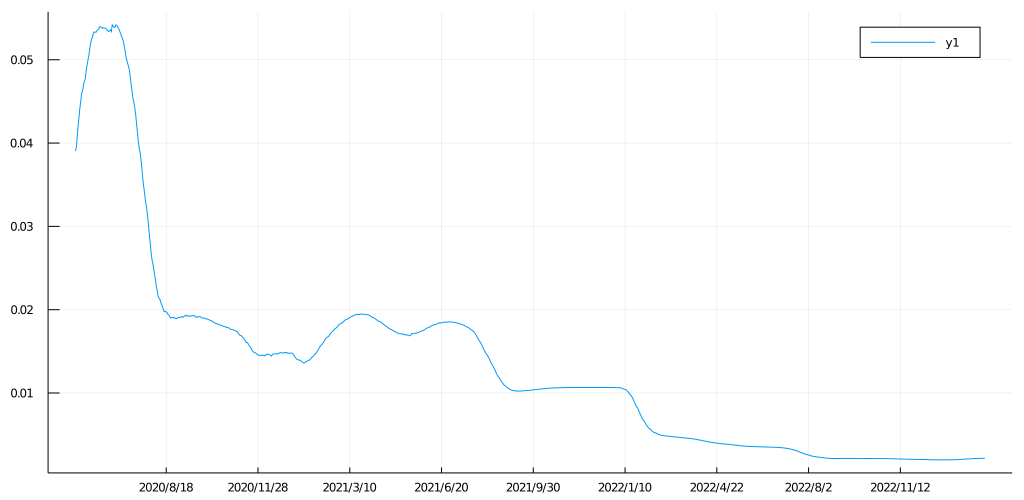

In [662]:
plot(df[:, "日付"], df[:, "致死率"], size=(1024, 500))